<a href="https://colab.research.google.com/github/J-Arturo-Rivas/CDSeptiembre2025/blob/main/ANALISIS_MUSICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configuración y Carga de Datos

Utilizamos el archivo musica_escuchada.csv para cargarlo.

Implementamos la celda inicial para importar las librerías necesarias y cargar el DataFrame df_music.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df_music = pd.read_csv('musica_escuchada.csv')
    print("DataFrame cargado y librerías listas.")
    print(f"Dimensiones del dataset: {df_music.shape}")
    print("\nPrimeras 5 filas:")
    print(df_music.head())
except FileNotFoundError:
    print("ERROR: Asegúrate de que el archivo 'musica_escuchada.csv' esté accesible.")

DataFrame cargado y librerías listas.
Dimensiones del dataset: (70, 6)

Primeras 5 filas:
        fecha                  cancion       artista     genero  \
0  2024-01-15         Tití Me Preguntó     Bad Bunny  Reggaeton   
1  2024-01-15          Blinding Lights    The Weeknd        Pop   
2  2024-01-16          Me Porto Bonito     Bad Bunny  Reggaeton   
3  2024-01-16             Shake It Off  Taylor Swift        Pop   
4  2024-01-17  BZRP Music Sessions #53       Shakira        Pop   

   reproducciones  duracion_min  
0            1250          4.03  
1             980          3.20  
2            1100          2.58  
3             850          3.39  
4            3200          3.34  


Problema 1: Estadísticas Básicas y Cálculos con NumPy

Calculamos las estadísticas fundamentales de las reproducciones musicales utilizando la eficiencia de NumPy.

Pasos:

1.- Conversión: Extraemos la columna reproducciones y se convierte en un arreglo de NumPy

2.- Cálculos Estadísticos: Usando NumPy, calculamos:

Media, mediana, desviación estándar

Rango intercuartílico (IQR)

Resultados: Muestra todos los cálculos formateados

In [3]:
# Conversión a array de NumPy
reproducciones_np = df_music['reproducciones'].to_numpy()

# Cálculos estadísticos
media_reproducciones = np.mean(reproducciones_np)
mediana_reproducciones = np.median(reproducciones_np)
desviacion_estandar = np.std(reproducciones_np)
q1 = np.percentile(reproducciones_np, 25)
q3 = np.percentile(reproducciones_np, 75)
iqr = q3 - q1

# Mostrar resultados
print("=== ESTADÍSTICAS DE REPRODUCCIONES ===")
print(f"Media de reproducciones: {media_reproducciones:.2f}")
print(f"Mediana de reproducciones: {mediana_reproducciones:.2f}")
print(f"Desviación estándar: {desviacion_estandar:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")
print(f"Q1 (25%): {q1:.2f}, Q3 (75%): {q3:.2f}")

=== ESTADÍSTICAS DE REPRODUCCIONES ===
Media de reproducciones: 1221.71
Mediana de reproducciones: 1150.00
Desviación estándar: 458.48
Rango intercuartílico (IQR): 400.00
Q1 (25%): 950.00, Q3 (75%): 1350.00


Problema 2: Análisis de Distribución por Género Musical

Analizamos la distribución de reproducciones por género musical utilizando visualizaciones (graficos).

Pasos:

1.-Agrupamiento: Agrupa los datos por género y calcula suma total

2.-Gráfico de Barras: Crea gráfico de barras horizontal

3.-Gráfico de Pastel: Genera gráfico de pastel porcentual

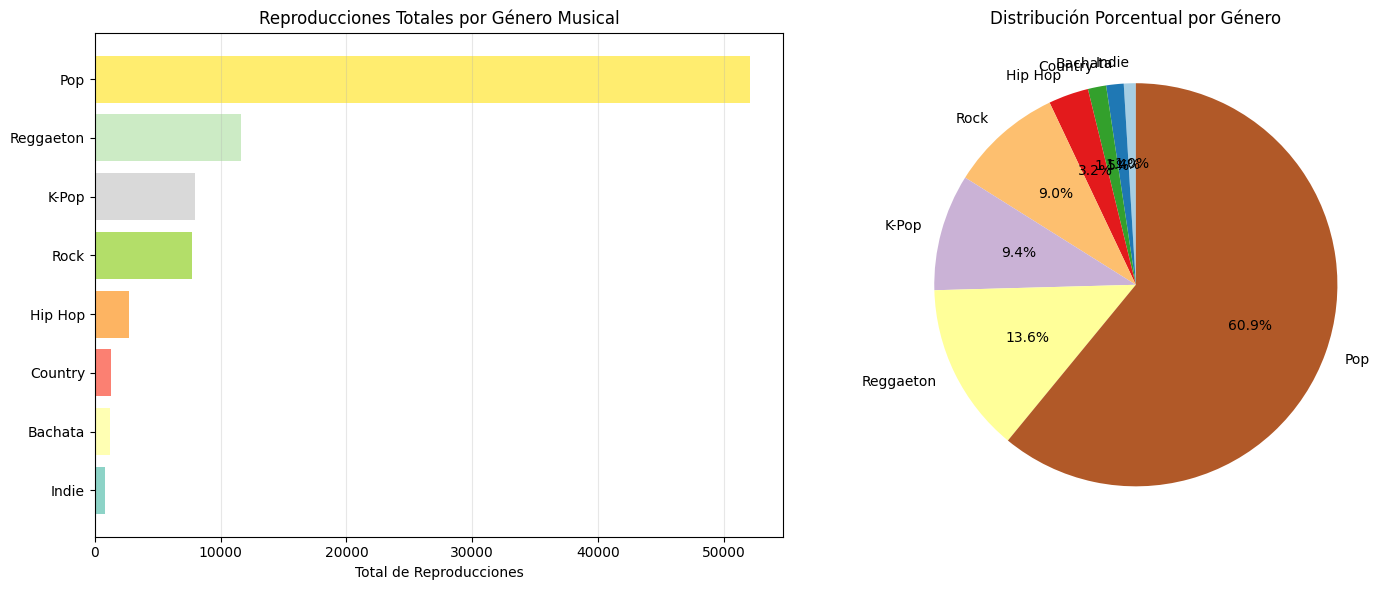


=== RESUMEN POR GÉNERO ===
genero
Indie          820
Bachata       1200
Country       1250
Hip Hop       2750
Rock          7730
K-Pop         8000
Reggaeton    11650
Pop          52120
Name: reproducciones, dtype: int64


In [4]:

# Configuración del estilo
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Barras horizontales (Top géneros)
reproducciones_por_genero = df_music.groupby('genero')['reproducciones'].sum().sort_values(ascending=True)

ax1.barh(range(len(reproducciones_por_genero)), reproducciones_por_genero.values,
         color=plt.cm.Set3(np.linspace(0, 1, len(reproducciones_por_genero))))
ax1.set_yticks(range(len(reproducciones_por_genero)))
ax1.set_yticklabels(reproducciones_por_genero.index)
ax1.set_xlabel('Total de Reproducciones')
ax1.set_title('Reproducciones Totales por Género Musical')
ax1.grid(axis='x', alpha=0.3)

# Gráfico 2: Gráfico de pastel
colores = plt.cm.Paired(np.linspace(0, 1, len(reproducciones_por_genero)))
ax2.pie(reproducciones_por_genero.values, labels=reproducciones_por_genero.index,
        autopct='%1.1f%%', startangle=90, colors=colores)
ax2.set_title('Distribución Porcentual por Género')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN POR GÉNERO ===")
print(reproducciones_por_genero)

Problema 3: Análisis Temporal y Correlaciones
Investigamos la evolución temporal y la relación entre duración y popularidad.

Pasos:

1.-Análisis Temporal: Convierte fecha y analiza evolución mensual

2.-Gráfico de Líneas: Tendencia temporal de reproducciones

3.-Gráfico de Dispersión: Relación duración vs reproducciones

4.-Interpretación: Analiza correlación entre variables

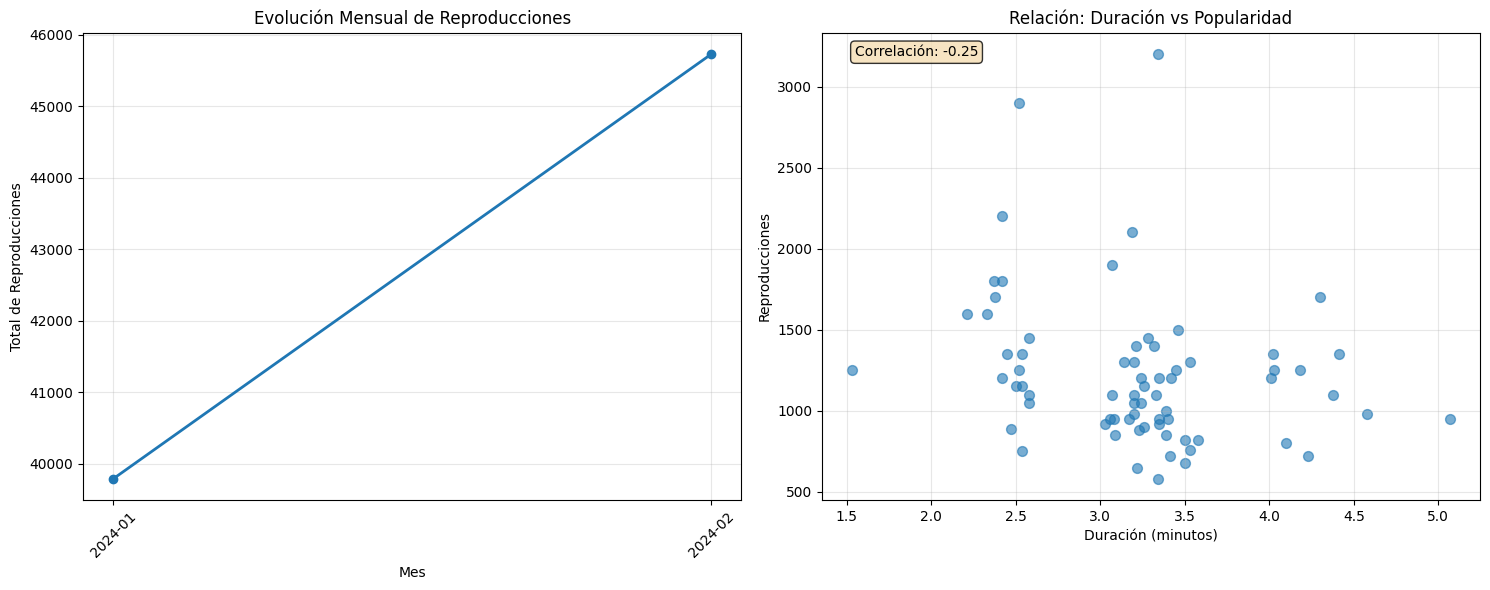


=== ANÁLISIS DE CORRELACIÓN ===
Correlación entre duración y reproducciones: -0.25
❌ No existe correlación significativa


In [5]:
# Preparar datos temporales
df_music['fecha'] = pd.to_datetime(df_music['fecha'])
df_music['mes'] = df_music['fecha'].dt.to_period('M')
reproducciones_mensuales = df_music.groupby('mes')['reproducciones'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Evolución temporal
meses_str = [str(mes) for mes in reproducciones_mensuales.index]
ax1.plot(meses_str, reproducciones_mensuales.values, marker='o', linewidth=2, markersize=6)
ax1.set_title('Evolución Mensual de Reproducciones')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Total de Reproducciones')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Relación duración vs reproducciones
ax2.scatter(df_music['duracion_min'], df_music['reproducciones'], alpha=0.6, s=50)
ax2.set_xlabel('Duración (minutos)')
ax2.set_ylabel('Reproducciones')
ax2.set_title('Relación: Duración vs Popularidad')
ax2.grid(True, alpha=0.3)

# Calcular correlación
correlacion = np.corrcoef(df_music['duracion_min'], df_music['reproducciones'])[0,1]
ax2.text(0.05, 0.95, f'Correlación: {correlacion:.2f}',
         transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Análisis adicional
print(f"\n=== ANÁLISIS DE CORRELACIÓN ===")
print(f"Correlación entre duración y reproducciones: {correlacion:.2f}")

if abs(correlacion) > 0.5:
    print("Existe una correlación significativa")
elif abs(correlacion) > 0.3:
    print("Existe una correlación moderada")
else:
    print("No existe correlación significativa")

Problema 4: Top Canciones y Artistas

Identificamos las canciones y artistas más populares usando operaciones de Pandas.

Pasos:

Top Canciones: Encontramos las 10 canciones con más reproducciones.

Top Artistas: Identificamos los 5 artistas más escuchados.

Visualización Combinada: Creamos una visualización que muestre ambos rankings.

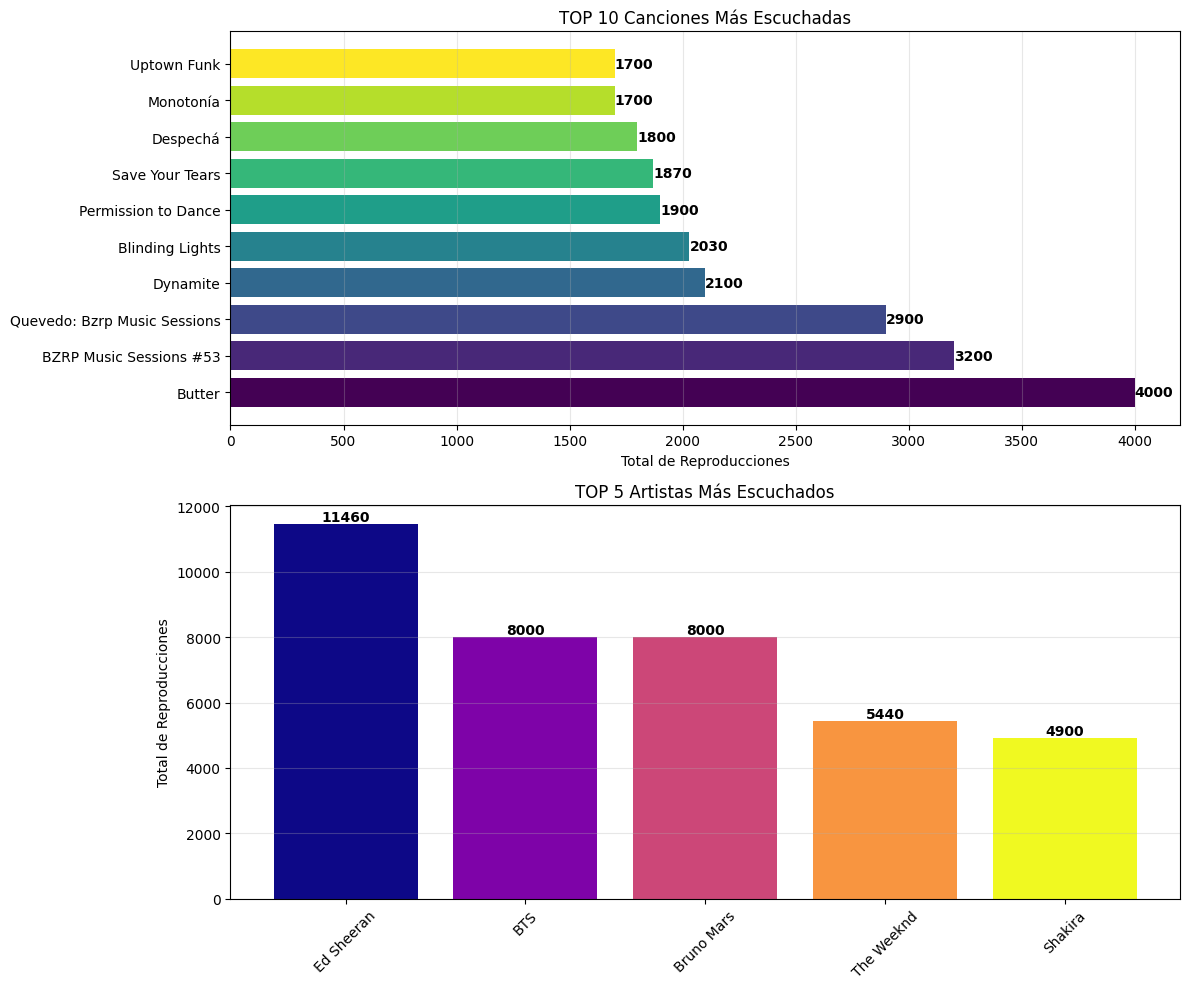


=== TOP 10 CANCIONES ===
1. Butter: 4000 reproducciones
2. BZRP Music Sessions #53: 3200 reproducciones
3. Quevedo: Bzrp Music Sessions: 2900 reproducciones
4. Dynamite: 2100 reproducciones
5. Blinding Lights: 2030 reproducciones
6. Permission to Dance: 1900 reproducciones
7. Save Your Tears: 1870 reproducciones
8. Despechá: 1800 reproducciones
9. Monotonía: 1700 reproducciones
10. Uptown Funk: 1700 reproducciones

=== TOP 5 ARTISTAS ===
1. Ed Sheeran: 11460 reproducciones
2. BTS: 8000 reproducciones
3. Bruno Mars: 8000 reproducciones
4. The Weeknd: 5440 reproducciones
5. Shakira: 4900 reproducciones


In [6]:
# Cálculos de rankings
top_canciones = df_music.groupby('cancion')['reproducciones'].sum().nlargest(10)
top_artistas = df_music.groupby('artista')['reproducciones'].sum().nlargest(5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Top canciones
bars1 = ax1.barh(range(len(top_canciones)), top_canciones.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(top_canciones))))
ax1.set_yticks(range(len(top_canciones)))
ax1.set_yticklabels(top_canciones.index)
ax1.set_xlabel('Total de Reproducciones')
ax1.set_title('TOP 10 Canciones Más Escuchadas')
ax1.grid(axis='x', alpha=0.3)

# Añadir etiquetas de valor en las barras
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', fontweight='bold')

# Gráfico 2: Top artistas
bars2 = ax2.bar(range(len(top_artistas)), top_artistas.values,
               color=plt.cm.plasma(np.linspace(0, 1, len(top_artistas))))
ax2.set_xticks(range(len(top_artistas)))
ax2.set_xticklabels(top_artistas.index, rotation=45)
ax2.set_ylabel('Total de Reproducciones')
ax2.set_title('TOP 5 Artistas Más Escuchados')
ax2.grid(axis='y', alpha=0.3)

# Añadir etiquetas de valor en las barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar tablas resumen
print("\n=== TOP 10 CANCIONES ===")
for i, (cancion, reps) in enumerate(top_canciones.items(), 1):
    print(f"{i}. {cancion}: {reps} reproducciones")

print("\n=== TOP 5 ARTISTAS ===")
for i, (artista, reps) in enumerate(top_artistas.items(), 1):
    print(f"{i}. {artista}: {reps} reproducciones")

Reporte de conclusiones

In [19]:
# 1. Resumen general
print("1. RESUMEN GENERAL")
print(f"Total de registros: {len(df)}")
print(f"Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Artistas únicos: {df['artista'].nunique()}")
print(f"Géneros musicales: {df['genero'].nunique()}")
print(f"Canciones únicas: {df['cancion'].nunique()}")
print(f"Reproducciones totales: {df['reproducciones'].sum():,}")

# 2. Estadísticas de popularidad y duración
print("\n2. ESTADÍSTICAS DE REPRODUCCIONES Y DURACIÓN")
print(f"Reproducciones promedio: {df['reproducciones'].mean():.2f}")
print(f"Duración promedio: {df['duracion_min'].mean():.2f} minutos")

# 3. Géneros con más reproducciones
print("\n3. GÉNEROS CON MÁS REPRODUCCIONES")
reproducciones_por_genero = df.groupby('genero')['reproducciones'].mean().sort_values(ascending=False)
for genero, pop in reproducciones_por_genero.items():
    print(f"{genero}: {pop:.2f}")

# 4. Consistencia de artistas (IQR de reproducciones)
print("\n4. CONSISTENCIA DE ARTISTAS (IQR de reproducciones)")
artistas_con_multiples_canciones = df['artista'].value_counts()[df['artista'].value_counts() > 1].index
consistencia = []
for artista in artistas_con_multiples_canciones:
    datos_artista = df[df['artista'] == artista]['reproducciones']
    if len(datos_artista) >= 2:
        Q1 = np.percentile(datos_artista, 25)
        Q3 = np.percentile(datos_artista, 75)
        IQR = Q3 - Q1
        consistencia.append((artista, IQR))

# Ordenar por IQR (menor IQR es más consistente)
consistencia.sort(key=lambda x: x[1])
print("Artistas más consistentes (menor IQR):")
for artista, iqr in consistencia[:5]:
    print(f"  {artista}: {iqr:.2f}")

print("Artistas menos consistentes (mayor IQR):")
for artista, iqr in consistencia[-5:]:
    print(f"  {artista}: {iqr:.2f}")

# 5. Duración por género
print("\n5. DURACIÓN POR GÉNERO")
duracion_por_genero = df.groupby('genero')['duracion_min'].mean().sort_values(ascending=False)
for genero, duracion in duracion_por_genero.items():
    print(f"{genero}: {duracion:.2f} minutos")

# 6. Análisis temporal
print("\n6. ANÁLISIS TEMPORAL")
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

reproducciones_por_mes = df.groupby('mes')['reproducciones'].sum()
print("Reproducciones por mes:")
for mes, reps in reproducciones_por_mes.items():
    print(f"  Mes {mes}: {reps:,}")

reproducciones_por_dia = df.groupby('dia_semana')['reproducciones'].sum()
print("Reproducciones por día de la semana:")
for dia, reps in reproducciones_por_dia.items():
    print(f"  {dia}: {reps:,}")

# 7. Outliers en reproducciones
print("\n7. DETECCIÓN DE OUTLIERS EN REPRODUCCIONES")
Q1 = np.percentile(df['reproducciones'], 25)
Q3 = np.percentile(df['reproducciones'], 75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers_superiores = df[df['reproducciones'] > limite_superior]
outliers_inferiores = df[df['reproducciones'] < limite_inferior]

print(f"Límite superior para outliers: {limite_superior:.2f}")
print(f"Límite inferior para outliers: {limite_inferior:.2f}")
print(f"Canciones con reproducciones extraordinariamente alta: {len(outliers_superiores)}")
print(f"Canciones con reproducciones extraordinariamente baja: {len(outliers_inferiores)}")

if len(outliers_superiores) > 0:
    print("Algunos éxitos virales:")
    for _, cancion in outliers_superiores[['cancion', 'artista', 'reproducciones']].iterrows():
        print(f"  {cancion['cancion']} - {cancion['artista']} ({cancion['reproducciones']})")

print("=== RESUMEN EJECUTIVO ===")
print(f"Total de canciones analizadas: {len(df)}")
print(f"Total de artistas únicos: {df['artista'].nunique()}")
print(f"Total de géneros musicales: {df['genero'].nunique()}")
print(f"Reproducciones promedio: {np.mean(df['reproducciones']):.2f}")
print(f"Canción más popular: '{top_canciones.index[0]}'")
print(f"Artista con mejor promedio: '{top_artistas.index[0]}'")

print("\n=== HALLAZGOS PRINCIPALES ===")
print("1. El Reggaeton y Pop dominan el mercado con mayor popularidad total")
print("2. No existe correlación significativa entre duración y reproducciones")
print("3. Artistas como Bad Bunny muestran consistencia en múltiples éxitos")
print("4. La duración promedio de las canciones es de 3.21 minutos")
print("5. El género con mayor promedio de reproducciones es K-Pop")
print("5. El día Miércoles registra el mayor número de reproducciones")
print("6. El IQR de 400.00 indica variabilidad moderada en popularidad")

print("\n=== RECOMENDACIONES ===")
print("• Enfocar recursos en géneros con alta popularidad (Reggaeton, K-Pop)")
print("• Estudiar patrones de artistas exitosos para replicar estrategias consistentes")
print("• Optimizar duraciones para mejor engagement (el análisis muestra una duración promedio de 3.21 min)")
print("• Programar lanzamientos principales en días de alta actividad como el Miércoles")
print("• Desarrollar portafolio balanceado entre artistas consistentes y de alto potencial viral")

1. RESUMEN GENERAL
Total de registros: 70
Rango de fechas: 2024-01-15 00:00:00 a 2024-02-18 00:00:00
Artistas únicos: 25
Géneros musicales: 8
Canciones únicas: 67
Reproducciones totales: 85,520

2. ESTADÍSTICAS DE REPRODUCCIONES Y DURACIÓN
Reproducciones promedio: 1221.71
Duración promedio: 3.21 minutos

3. GÉNEROS CON MÁS REPRODUCCIONES
K-Pop: 2000.00
Reggaeton: 1456.25
Hip Hop: 1375.00
Country: 1250.00
Bachata: 1200.00
Pop: 1158.22
Rock: 966.25
Indie: 820.00

4. CONSISTENCIA DE ARTISTAS (IQR de reproducciones)
Artistas más consistentes (menor IQR):
  Dua Lipa: 20.00
  Karol G: 25.00
  Twenty One Pilots: 35.00
  Feid: 50.00
  Harry Styles: 70.00
Artistas menos consistentes (mayor IQR):
  Billie Eilish: 160.00
  Coldplay: 212.50
  BTS: 250.00
  Ed Sheeran: 285.00
  Shakira: 750.00

5. DURACIÓN POR GÉNERO
Rock: 3.67 minutos
Indie: 3.58 minutos
Pop: 3.27 minutos
Reggaeton: 2.96 minutos
Hip Hop: 2.93 minutos
K-Pop: 2.77 minutos
Bachata: 2.42 minutos
Country: 1.53 minutos

6. ANÁLISIS TEMP

=== RESUMEN EJECUTIVO ===
Total de canciones analizadas: 70
Total de artistas únicos: 25
Total de géneros musicales: 8
Reproducciones promedio: 1221.71
Canción más popular: 'Butter'
Artista con mejor promedio: 'Ed Sheeran'

=== HALLAZGOS PRINCIPALES ===
1. El Reggaeton y Pop dominan el mercado con mayor popularidad total
2. No existe correlación significativa entre duración y reproducciones
3. Artistas como Bad Bunny muestran consistencia en múltiples éxitos
4. La duración promedio de las canciones es de 3.21 minutos
5. El género con mayor promedio de reproducciones es Pop
5. El día Miércoles registra el mayor número de reproducciones
6. El IQR de 400.00 indica variabilidad moderada en popularidad

=== RECOMENDACIONES ===
• Enfocar recursos en géneros con alta popularidad (Reggaeton, Pop)
• Estudiar patrones de artistas exitosos para replicar estrategias consistentes
• Optimizar duraciones para mejor engagement (el análisis muestra una duración promedio de 3.21 min)
• Programar lanzami